In [ ]:
import random
import collections
import math
import sys
import copy
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
newTrain = pd.read_csv('newTrain.csv')

In [ ]:
newTest = pd.read_csv('newTest.csv')

In [ ]:
newTrain.drop(newTrain.columns[0],axis=1,inplace=True)
newTest.drop(newTest.columns[0],axis=1,inplace=True)

In [ ]:
newTrain['truth'] += 1
newTrain['truth'] /= 2

newTrain['characters2'] += 1
newTrain['characters2'] /= 2

newTrain['characters3'] += 1
newTrain['characters3'] /= 2

newTrain['characters4'] += 1
newTrain['characters4'] /= 2

newTrain['combined'] += 1
newTrain['combined'] /= 2

newTrain['words'] += 1
newTrain['words'] /= 2



newTest['truth'] += 1
newTest['truth'] /= 2

newTest['characters2'] += 1
newTest['characters2'] /= 2

newTest['characters3'] += 1
newTest['characters3'] /= 2

newTest['characters4'] += 1
newTest['characters4'] /= 2

newTest['combined'] += 1
newTest['combined'] /= 2

newTest['words'] += 1
newTest['words'] /= 2

In [ ]:
newTrain.head()

,created,day,hr,month,name,text,truth,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText
0,2013-08-14 12:54:00,14.0,12.0,8.0,karenhbullard,@SydnieJR except once the Hallmark movies star...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.318182,0.056818
1,2010-07-04 13:08:00,4.0,13.0,7.0,amajorpain,Shaw vows to 'work across the aisle' to figh h...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.242647,0.102941
2,2016-12-28 16:04:36,28.0,16.0,12.0,melvinsroberts,RT @rashawnleo91: #2016In4Words GAYS RULED THE...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.315789,0.368421
3,2009-06-09 07:54:00,9.0,7.0,6.0,Spandavia,@SMEAllianceLtd Isn't that the pension scheme ...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.173611,0.062500
4,2010-03-17 08:21:00,17.0,8.0,3.0,AmnahThunyan,The only difference between pointers of differ...,1.0,1.0,1.0,1.0,1.0,1.0,0,0.190909,0.063636


In [ ]:
newTrain.shape

(20000, 15)

In [ ]:
newTest.shape

(2000, 15)

In [ ]:
train_x = newTrain.drop(columns=['truth','created','name','text'])
train_x['day'] = train_x['day'].astype(int)
train_x['hr'] = train_x['hr'].astype(int)
train_x['month'] = train_x['month'].astype(int)

train_y = newTrain[['truth']]

In [ ]:
test_x = newTest.drop(columns=['truth','created','name','text'])
test_x['day'] = test_x['day'].astype(int)
test_x['hr'] = test_x['hr'].astype(int)
test_x['month'] = test_x['month'].astype(int)

test_y = newTest[['truth']]

In [ ]:
train_x.describe(include='all')

,day,hr,month,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,15.92260,12.208700,6.694600,0.513100,0.500000,0.500450,0.503000,0.506350,0.604450,0.238764,0.107062
std,8.58321,6.002103,3.574069,0.499841,0.500013,0.500012,0.500004,0.499972,1.432373,0.054246,0.087240
min,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.00000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205607,0.054054
50%,16.00000,13.000000,7.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.233577,0.096774
75%,23.00000,17.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.267857,0.134921
max,31.00000,23.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000


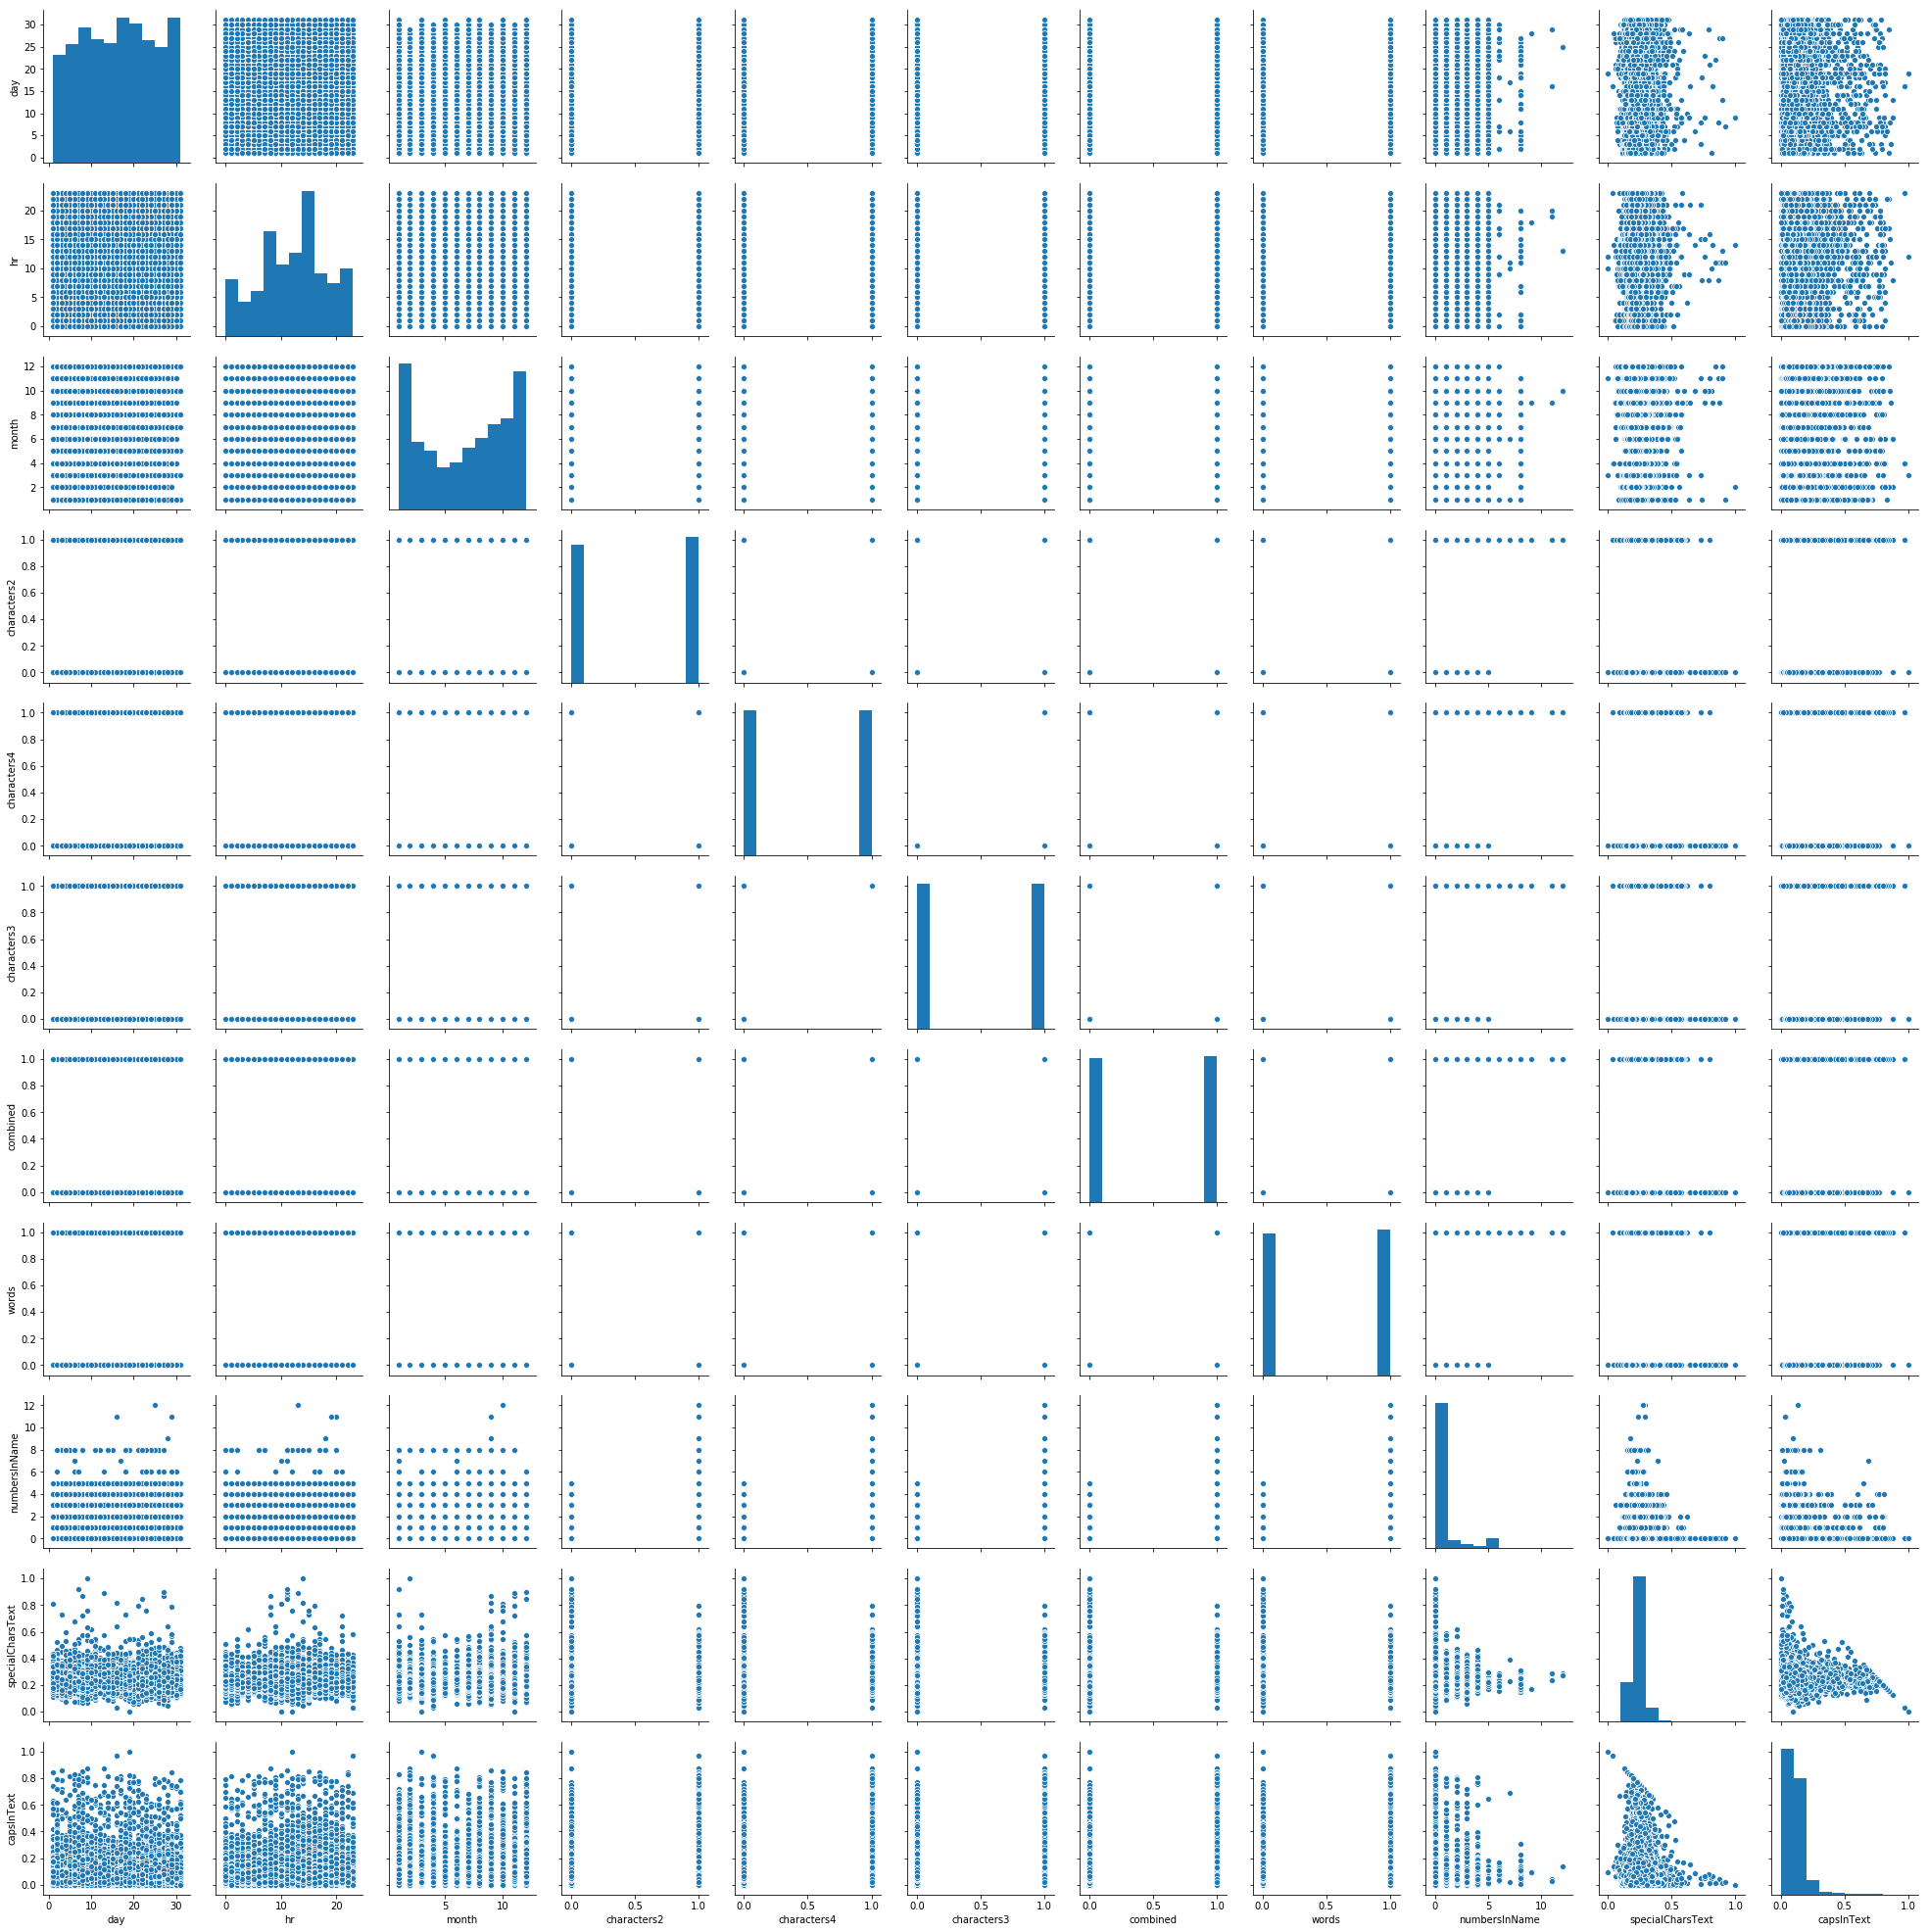

In [ ]:
sns.pairplot(train_x)

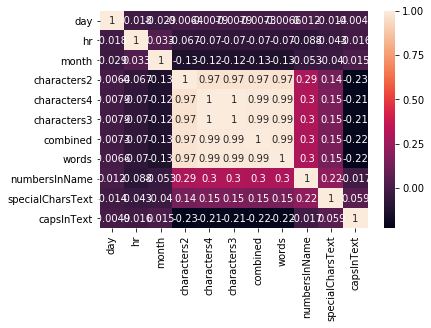

In [ ]:
sns.heatmap(train_x.corr(), annot=True)

In [ ]:
train_x.head()

,day,hr,month,characters2,characters4,characters3,combined,words,numbersInName,specialCharsText,capsInText
0,14,12,8,1.0,1.0,1.0,1.0,1.0,0,0.318182,0.056818
1,4,13,7,1.0,1.0,1.0,1.0,1.0,0,0.242647,0.102941
2,28,16,12,0.0,0.0,0.0,0.0,0.0,0,0.315789,0.368421
3,9,7,6,1.0,1.0,1.0,1.0,1.0,0,0.173611,0.062500
4,17,8,3,1.0,1.0,1.0,1.0,1.0,0,0.190909,0.063636


In [ ]:
train_y.head()

,truth
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [ ]:
np_train_x = train_x.to_numpy()
np_train_y = train_y.to_numpy()

np_test_x = test_x.to_numpy()
np_test_y = test_y.to_numpy()

In [ ]:
np_train_x

array([[14.        , 12.        ,  8.        , ...,  0.        ,
         0.31818182,  0.05681818],
       [ 4.        , 13.        ,  7.        , ...,  0.        ,
         0.24264706,  0.10294118],
       [28.        , 16.        , 12.        , ...,  0.        ,
         0.31578947,  0.36842105],
       ...,
       [19.        ,  9.        , 12.        , ...,  0.        ,
         0.27586207,  0.1637931 ],
       [26.        , 17.        ,  9.        , ...,  0.        ,
         0.2       ,  0.06428571],
       [28.        ,  7.        , 12.        , ...,  0.        ,
         0.18796992,  0.23308271]])

In [ ]:
np_train_y

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
np_train_x = sc.fit_transform(np_train_x)
np_test_x = sc.fit_transform(np_test_x)

In [ ]:
np_train_x

array([[-0.22400105, -0.03477201,  0.3652511 , ..., -0.42200255,
         1.4640522 , -0.57593568],
       [-1.38909547,  0.13184041,  0.08545096, ..., -0.42200255,
         0.07157874, -0.0472315 ],
       [ 1.40713114,  0.63167768,  1.48445164, ..., -0.42200255,
         1.41994964,  2.99594296],
       ...,
       [ 0.35854616, -0.53460928,  1.48445164, ..., -0.42200255,
         0.68389313,  0.65030924],
       [ 1.17411225,  0.79829011,  0.64505123, ..., -0.42200255,
        -0.71461424, -0.49033596],
       [ 1.40713114, -0.86783413,  1.48445164, ..., -0.42200255,
        -0.93638711,  1.44457039]])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard
from sklearn import preprocessing
from keras.regularizers import l2, l1
from keras.utils import plot_model

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=11))#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
#Fitting the data to the training dataset
history = classifier.fit(np_train_x,np_train_y, batch_size=100, epochs=20, validation_split=0.1)

Train on 18000 samples, validate on 2000 samples
Epoch 1/20
18000/18000 [==============================] - 1s 70us/sample - loss: 0.6331 - accuracy: 0.9746 - val_loss: 0.4705 - val_accuracy: 0.9915
Epoch 2/20
18000/18000 [==============================] - 1s 30us/sample - loss: 0.2381 - accuracy: 0.9956 - val_loss: 0.0866 - val_accuracy: 0.9970
Epoch 3/20
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0486 - accuracy: 0.9975 - val_loss: 0.0255 - val_accuracy: 0.9980
Epoch 4/20
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0195 - accuracy: 0.9978 - val_loss: 0.0125 - val_accuracy: 0.9985
Epoch 5/20
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0117 - accuracy: 0.9981 - val_loss: 0.0078 - val_accuracy: 0.9990
Epoch 6/20
18000/18000 [==============================] - 1s 30us/sample - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.0054 - val_accuracy: 0.9990
Epoch 7/20
18000/18000 [==============================] -

dict_keys(['loss', 'val_loss', 'val_accuracy', 'accuracy'])


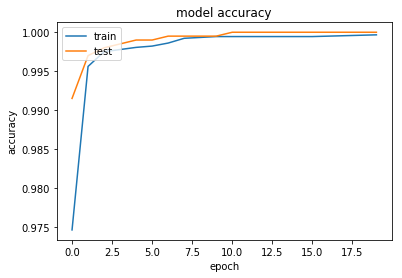

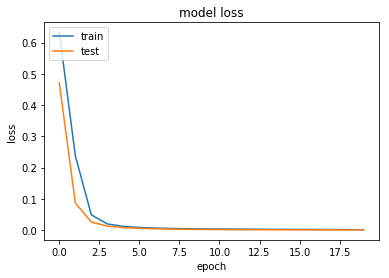

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
classifier.evaluate(np_train_x, np_train_y, verbose=0)

[0.0004675959601765498, 0.9999]

In [ ]:
y_pred=classifier.predict(np_test_x)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np_test_y, y_pred)
print(cm)

[[947  53]
 [150 850]]


In [ ]:
 from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(np_train_x, np_train_y)

In [ ]:
y_pred_rf = rf.predict(np_test_x)
y_pred_rf =(y_pred_rf>0.5)
cm = confusion_matrix(np_test_y, y_pred_rf) 
print(cm)

In [ ]:
feature_list = list(train_x_dropped.columns)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3) 
rf_small.fit(np_train_x, np_train_y)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image 
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=feature_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot') 
graph.write_png('small_tree.png');

In [ ]:
y_pred_rf_small = rf_small.predict(np_test_x) 
y_pred_rf_small =(y_pred_rf_small>0.5)
cm = confusion_matrix(np_test_y, y_pred_rf_small) 
print(cm)